In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [2]:
import dask.dataframe as dd
import dask_geopandas as dg

In [43]:
import time
start = time.time()
tracks = dd.read_csv('gb_gpx.csv')
end = time.time()
print("read_csv: ",(end-start),"sec")

read_csv:  0.015339136123657227 sec


In [44]:
tracks.head(n=10)

,id,type,time,ordering,X,Y,elevation
0,000/003/000003605,identifiable,2006-05-10T08:26:23Z,0,-1.221488,50.653785,84.8
1,000/003/000003605,identifiable,2006-05-10T08:26:24Z,1,-1.221358,50.653686,85.2
2,000/003/000003605,identifiable,2006-05-10T08:26:25Z,2,-1.221236,50.653588,84.8
3,000/003/000003605,identifiable,2006-05-10T08:26:31Z,3,-1.220758,50.653413,97.7
4,000/003/000003605,identifiable,2006-05-10T08:26:32Z,4,-1.220616,50.653438,86.3
5,000/003/000003605,identifiable,2006-05-10T08:26:33Z,5,-1.220443,50.653558,112.3
6,000/003/000003605,identifiable,2006-05-10T08:26:34Z,6,-1.220485,50.653548,78.4
7,000/003/000003605,identifiable,2006-05-10T08:26:35Z,7,-1.220393,50.653620,80.7
8,000/003/000003605,identifiable,2006-05-10T08:26:36Z,8,-1.220285,50.653690,79.8
9,000/003/000003605,identifiable,2006-05-10T08:26:37Z,9,-1.220173,50.653771,79.8


In [5]:
import cartopy.io.shapereader as shpreader

ne_earth_countries = shpreader.natural_earth(resolution = '10m',
                                       category = 'cultural',
                                       name='admin_0_countries')

countries = shpreader.Reader(ne_earth_countries)
countries = gpd.GeoDataFrame(countries._data)

In [6]:
gb = countries[countries.ADMIN.str.contains('United Kingdom')]
gb = gb.explode()

BRITAIN = gb.geometry.area.idxmax()

gb = gpd.GeoDataFrame(geometry=gpd.GeoSeries(gb.iloc[BRITAIN[1]].geometry,  crs='epsg:4326'))
gb.head()

/var/folders/b6/h942qzzd5f721pfd0b3d411m0000gn/T/ipykernel_8357/1630019483.py:2: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  gb = gb.explode()


,geometry
0,"POLYGON ((-2.66535 51.61725, -2.69376 51.59618..."


In [9]:
import datashader as ds
import datashader.transfer_functions as tf

In [10]:
from datashader.colors import Greys9, viridis, inferno
from colorcet import fire

In [18]:
min_x = tracks['X'].min()
min_y = tracks['Y'].min()
max_x = tracks['X'].max()
max_y = tracks['Y'].max()

In [19]:
min_x = min_x.compute()
min_y = min_y.compute()
max_x = max_x.compute()
max_y = max_y.compute()

In [35]:
min_x = gb.bounds.minx[0]
min_y = gb.bounds.miny[0]
max_x = gb.bounds.maxx[0]
max_y = gb.bounds.maxy[0]

In [22]:
mean_x = tracks['X'].mean().compute()
mean_y = tracks['Y'].mean().compute()

In [37]:
bound = 100
global_x_range = (min_x, max_x)
global_y_range = (min_y, max_y)

global_plot_width = 900
global_plot_height = int(global_plot_width*1.5)

In [38]:
canvas = ds.Canvas(
    plot_width=global_plot_width,
    plot_height=global_plot_height,
    x_range=global_x_range,
    y_range=global_y_range
)

agg = canvas.points(tracks, "X", "Y", agg=ds.count())

In [39]:
selected = agg.where(agg > 5)

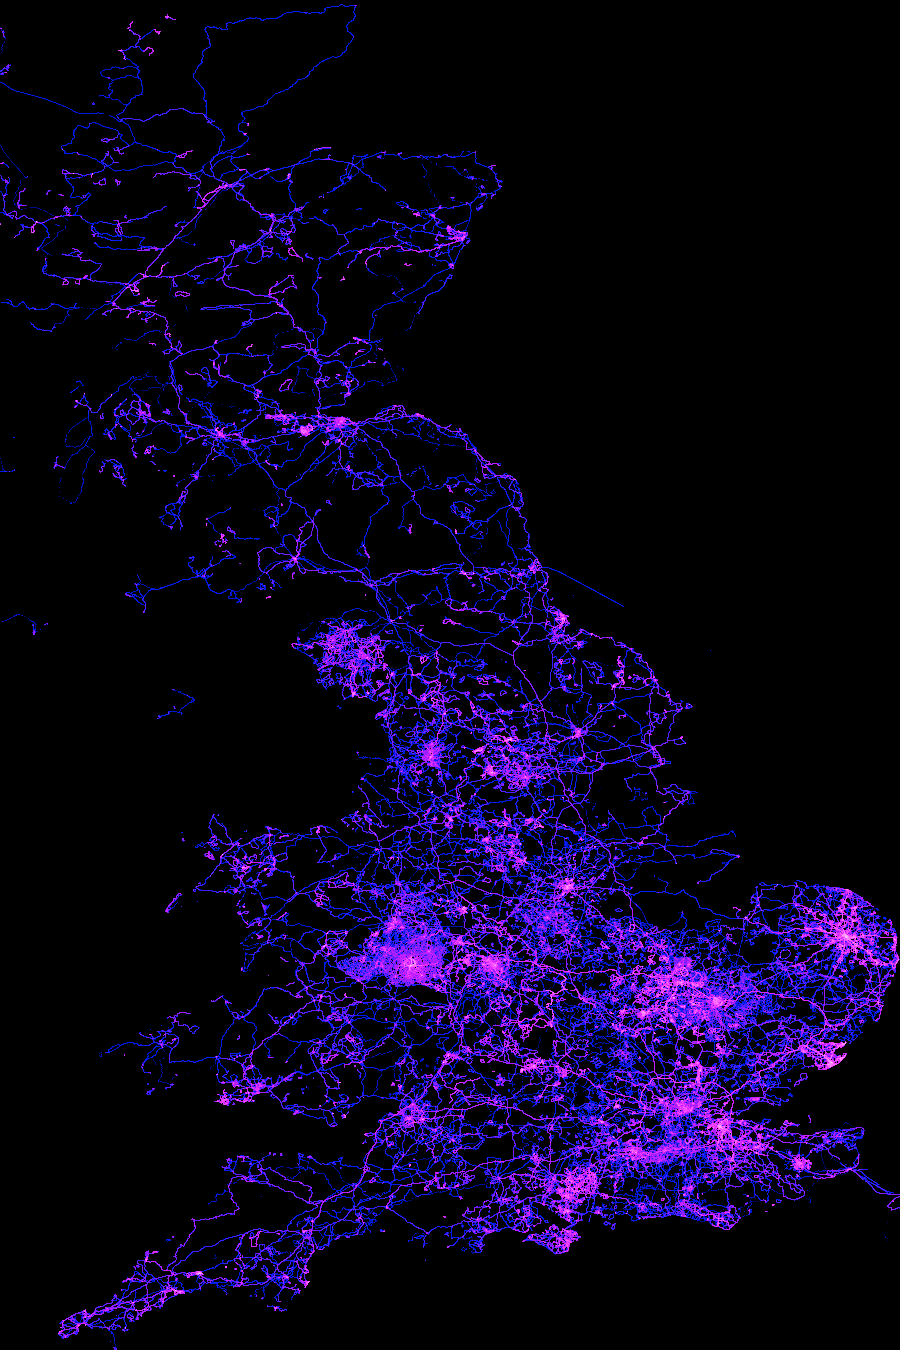

In [40]:
import colorcet as cc
tf.set_background(tf.shade(selected, cmap=cc.bmw, how='log'),"black")

In [45]:
geotracks = tracks.set_geometry(dg.points_from_xy(tracks, x="X", y="Y", crs=4326))
geotracks.head(n=10)

,id,type,time,ordering,X,Y,elevation,geometry
0,000/003/000003605,identifiable,2006-05-10T08:26:23Z,0,-1.221488,50.653785,84.8,POINT (-1.22149 50.65378)
1,000/003/000003605,identifiable,2006-05-10T08:26:24Z,1,-1.221358,50.653686,85.2,POINT (-1.22136 50.65369)
2,000/003/000003605,identifiable,2006-05-10T08:26:25Z,2,-1.221236,50.653588,84.8,POINT (-1.22124 50.65359)
3,000/003/000003605,identifiable,2006-05-10T08:26:31Z,3,-1.220758,50.653413,97.7,POINT (-1.22076 50.65341)
4,000/003/000003605,identifiable,2006-05-10T08:26:32Z,4,-1.220616,50.653438,86.3,POINT (-1.22062 50.65344)
5,000/003/000003605,identifiable,2006-05-10T08:26:33Z,5,-1.220443,50.653558,112.3,POINT (-1.22044 50.65356)
6,000/003/000003605,identifiable,2006-05-10T08:26:34Z,6,-1.220485,50.653548,78.4,POINT (-1.22049 50.65355)
7,000/003/000003605,identifiable,2006-05-10T08:26:35Z,7,-1.220393,50.653620,80.7,POINT (-1.22039 50.65362)
8,000/003/000003605,identifiable,2006-05-10T08:26:36Z,8,-1.220285,50.653690,79.8,POINT (-1.22029 50.65369)
9,000/003/000003605,identifiable,2006-05-10T08:26:37Z,9,-1.220173,50.653771,79.8,POINT (-1.22017 50.65377)


In [47]:
from dask.distributed import Client, LocalCluster
client = Client(
    LocalCluster(
        n_workers=8, 
        threads_per_worker=1
    )
)

In [53]:
joined = dg.sjoin(geotracks, gb, predicate="within")
joined = joined.compute()

/Users/andrewrenninger/anaconda3/envs/tinkering/lib/python3.9/site-packages/dask_geopandas/sjoin.py:60: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  meta = geopandas.sjoin(left._meta, right._meta, how=how, predicate=predicate)


In [62]:
joined.head(n=10)

,id,type,time,ordering,X,Y,elevation,geometry,index_right
1348,000/009/000009882,identifiable,2006-09-30T17:45:00Z,0,-0.011990,51.757966,NaN,POINT (-0.01199 51.75797),0
1349,000/009/000009882,identifiable,2006-09-30T17:45:00Z,1,-0.012435,51.757745,NaN,POINT (-0.01243 51.75774),0
1350,000/009/000009882,identifiable,2006-09-30T17:45:00Z,2,-0.012335,51.757821,NaN,POINT (-0.01234 51.75782),0
1351,000/009/000009882,identifiable,2006-09-30T17:45:00Z,3,-0.012291,51.757866,NaN,POINT (-0.01229 51.75787),0
1352,000/009/000009882,identifiable,2006-09-30T17:45:00Z,4,-0.012115,51.757978,NaN,POINT (-0.01212 51.75798),0
1353,000/009/000009882,identifiable,2006-09-30T17:45:00Z,5,-0.012048,51.758043,NaN,POINT (-0.01205 51.75804),0
1354,000/009/000009882,identifiable,2006-09-30T17:45:00Z,6,-0.012646,51.757693,NaN,POINT (-0.01265 51.75769),0
1355,000/009/000009882,identifiable,2006-09-30T17:45:00Z,7,-0.012691,51.757648,NaN,POINT (-0.01269 51.75765),0
1356,000/009/000009882,identifiable,2006-09-30T17:45:00Z,8,-0.012328,51.757906,NaN,POINT (-0.01233 51.75791),0
1357,000/009/000009882,identifiable,2006-09-30T17:45:00Z,9,-0.012276,51.757963,NaN,POINT (-0.01228 51.75796),0
